In [1]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator  # Note: ultralytics.yolo.utils.plotting is deprecated
import time
import torch

# Check if CUDA (GPU) is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained YOLOv8l model
model = YOLO('yolov8l.pt')
model.to(device)


/home/kushal/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_r

In [4]:
import json

# Path to the JSON file
json_file_path = "data/dev.jsonl"

# Dictionary to store image information
image_data = {}

# Open and read the JSON file
with open(json_file_path, 'r') as f:
    for line in f:
        entry = json.loads(line)
    
    # Iterate through each image entry in the JSON data
        # print(entry)
        image_id = int(entry['id'])
        image_path = "data/"+entry['img']
        label = int(entry['label'])
        text = entry['text']
        
        # Store image information in dictionary
        image_data[image_id] = {
            'image_id' : image_id,
            'image_path': image_path,
            'label': label,
            'text': text
        }
object_detection_results={}
i=int(0)
for key,elem in image_data.items():
    # print(elem)
    # if (elem['image_path']):
    if (i==100):
        with open("detection_result_test.json", 'w') as f:
            json.dump(object_detection_results, f)
        i=0
    else:
        i+=1
    results = model(elem['image_path'])
    class_ids=[]
    confs=[]
    bboxs=[]
    
    for result in results:
        for conf,class_id,bbox in zip(result.boxes.conf,result.boxes.cls,result.boxes.xyxy):
            if conf > 0.5:
                class_ids.append(int(class_id))
                confs.append(float(conf))
                bboxs.append(bbox.tolist())
    object_detection_results[key]={
        'class_ids': class_ids,
        'confs': confs,
        'bboxs': bboxs,
        'label': elem['label'],
    }




image 1/1 /home/kushal/Desktop/UG_2/Sem_2/Precog/data/img/08291.png: 448x640 6 persons, 1 handbag, 3 sports balls, 844.2ms
Speed: 3.1ms preprocess, 844.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/kushal/Desktop/UG_2/Sem_2/Precog/data/img/46971.png: 640x448 8 persons, 877.1ms
Speed: 1.8ms preprocess, 877.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /home/kushal/Desktop/UG_2/Sem_2/Precog/data/img/03745.png: 608x640 2 persons, 2 cups, 1 laptop, 1 mouse, 1080.3ms
Speed: 2.8ms preprocess, 1080.3ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 /home/kushal/Desktop/UG_2/Sem_2/Precog/data/img/83745.png: 640x448 1 motorcycle, 1087.1ms
Speed: 2.9ms preprocess, 1087.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /home/kushal/Desktop/UG_2/Sem_2/Precog/data/img/80243.png: 416x640 8 persons, 1047.6ms
Speed: 2.4ms preprocess, 1047.6ms inference, 0.9ms postproces

In [9]:
# print(len(object_detection_results))
import json
with open("object_details_test.json", 'w') as f:
    # object_detection_results=json.load(f
    json.dump(object_detection_results,f)
    # print(object_detection_results['42953'])

0 person
1 bicycle
2 car
3 motorcycle
4 airplane
5 bus
6 train
7 truck
8 boat
9 traffic light
10 fire hydrant
11 stop sign
12 parking meter
13 bench
14 bird
15 cat
16 dog
17 horse
18 sheep
19 cow
20 elephant
21 bear
22 zebra
23 giraffe
24 backpack
25 umbrella
26 handbag
27 tie
28 suitcase
29 frisbee
30 skis
31 snowboard
32 sports ball
33 kite
34 baseball bat
35 baseball glove
36 skateboard
37 surfboard
38 tennis racket
39 bottle
40 wine glass
41 cup
42 fork
43 knife
44 spoon
45 bowl
46 banana
47 apple
48 sandwich
49 orange
50 broccoli
51 carrot
52 hot dog
53 pizza
54 donut
55 cake
56 chair
57 couch
58 potted plant
59 bed
60 dining table
61 toilet
62 tv
63 laptop
64 mouse
65 remote
66 keyboard
67 cell phone
68 microwave
69 oven
70 toaster
71 sink
72 refrigerator
73 book
74 clock
75 vase
76 scissors
77 teddy bear
78 hair drier
79 toothbrush


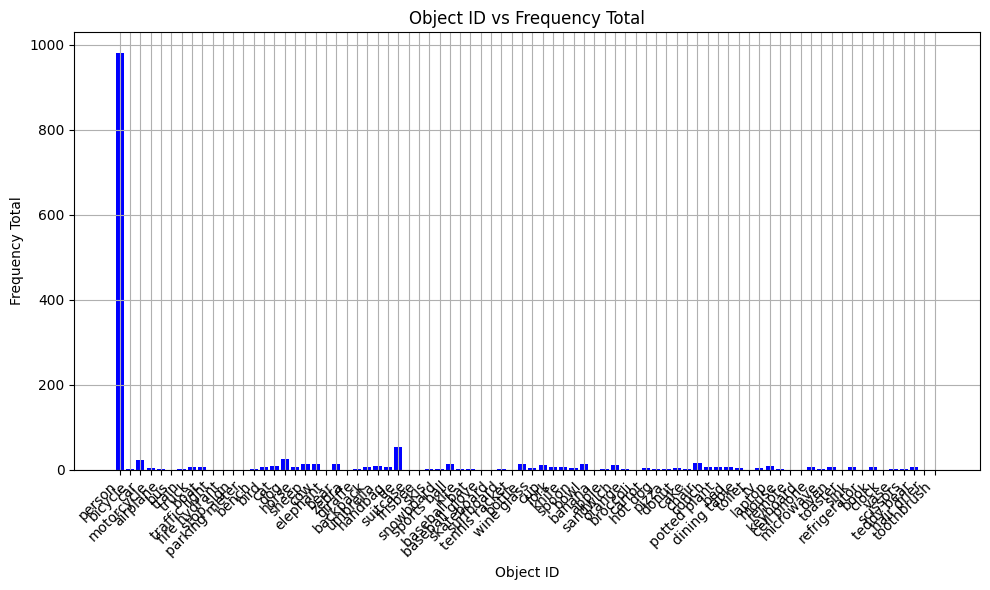

In [10]:
# import ultralytics.data.dataset as data
model=YOLO()
# print(model.names)
# import json
# annotations_file = 'annotations/instances_train2017_test.json'  # Adjust the path as needed
# with open(annotations_file, 'r') as f:
#     coco_annotations = json.load(f)
# Extract class labels from COCO annotations
class_labels = {}
for id,name in model.names.items():
    class_labels[int(id)] = name
    print(id,name)
    # print(category['id'],category['name'])
  
class_ids_hate_weight={}
for id,name in model.names.items():
    class_ids_hate_weight[id] = {
        'curr_val' : int(0),
        'freq_total' : int(0),
    }
for key,img_result in object_detection_results.items():
    for index,class_id in enumerate(img_result['class_ids']):
        class_ids_hate_weight[int(class_id)]['freq_total']+=1
        if (img_result['label']==1):
            class_ids_hate_weight[int(class_id)]['curr_val']-=1
        else:
            class_ids_hate_weight[int(class_id)]['curr_val']+=1


# print(class_ids_hate_weight)
with open("trained_test.json", 'w') as f:
    json.dump(class_ids_hate_weight, f)
    
    
import matplotlib.pyplot as plt


object_ids = list(class_ids_hate_weight.keys())
obj_names=[]
for elem in object_ids:
    obj_names.append(class_labels[elem])
freq_totals = [entry['freq_total'] for entry in class_ids_hate_weight.values()]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(obj_names, freq_totals, color='blue')
plt.xlabel('Object ID')
plt.ylabel('Frequency Total')
plt.title('Object ID vs Frequency Total')
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [11]:
for id,name in model.names.items():
    class_labels[int(id)] = name
    print(id,name)

0 person
1 bicycle
2 car
3 motorcycle
4 airplane
5 bus
6 train
7 truck
8 boat
9 traffic light
10 fire hydrant
11 stop sign
12 parking meter
13 bench
14 bird
15 cat
16 dog
17 horse
18 sheep
19 cow
20 elephant
21 bear
22 zebra
23 giraffe
24 backpack
25 umbrella
26 handbag
27 tie
28 suitcase
29 frisbee
30 skis
31 snowboard
32 sports ball
33 kite
34 baseball bat
35 baseball glove
36 skateboard
37 surfboard
38 tennis racket
39 bottle
40 wine glass
41 cup
42 fork
43 knife
44 spoon
45 bowl
46 banana
47 apple
48 sandwich
49 orange
50 broccoli
51 carrot
52 hot dog
53 pizza
54 donut
55 cake
56 chair
57 couch
58 potted plant
59 bed
60 dining table
61 toilet
62 tv
63 laptop
64 mouse
65 remote
66 keyboard
67 cell phone
68 microwave
69 oven
70 toaster
71 sink
72 refrigerator
73 book
74 clock
75 vase
76 scissors
77 teddy bear
78 hair drier
79 toothbrush
